
# Using GeoPandas with Rasterio to sample point data

This example shows how to use GeoPandas with Rasterio.  [Rasterio](https://rasterio.readthedocs.io/en/latest/index.html) is a package for reading and writing raster data.

In this example a set of vector points is used to sample raster data at those points.

The raster data used is Copernicus Sentinel data 2018 for Sentinel data.


In [1]:
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

Create example vector data
=============================

Generate a geodataframe from a set of points


In [2]:
# Create sampling points
points = [
    Point(625466, 5621289),
    Point(626082, 5621627),
    Point(627116, 5621680),
    Point(625095, 5622358),
]
gdf = geopandas.GeoDataFrame([1, 2, 3, 4], geometry=points, crs=32630)

The ``GeoDataFrame`` looks like this:

In [3]:
gdf.head()

,0,geometry
0,1,POINT (625466.000 5621289.000)
1,2,POINT (626082.000 5621627.000)
2,3,POINT (627116.000 5621680.000)
3,4,POINT (625095.000 5622358.000)


Open the raster data
=============================

Use ``rasterio`` to open the raster data to be sampled

In [4]:
src = rasterio.open("s2a_l2a_fishbourne.tif")

Let's see the raster data with the point data overlaid.



<Axes: >

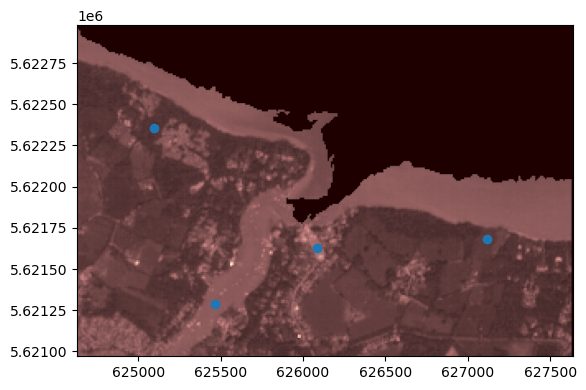

In [5]:
from rasterio.plot import show

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap="pink")

gdf.plot(ax=ax)

Sampling the data
===============
Rasterio requires a list of the coordinates in x,y format rather than as the points that are in the geomentry column.

This can be achieved using the code below

In [6]:
coord_list = [(x, y) for x, y in zip(gdf["geometry"].x, gdf["geometry"].y)]

Carry out the sampling of the data and store the results in a new column called `value`.  Note that if the image has more than one band, a value is returned for each band.

In [7]:
gdf["value"] = [x for x in src.sample(coord_list)]
gdf.head()

,0,geometry,value
0,1,POINT (625466.000 5621289.000),"[684.0, 1005.0, 707.0, 265.0]"
1,2,POINT (626082.000 5621627.000),"[999.0, 1105.0, 1115.0, 1340.0]"
2,3,POINT (627116.000 5621680.000),"[284.0, 713.0, 310.0, 5405.0]"
3,4,POINT (625095.000 5622358.000),"[237.0, 564.0, 250.0, 3680.0]"
